In [1]:
import logging
import os
from datetime import datetime
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Create logs directory and file path
timestamp = datetime.now().strftime('%m_%d_%Y_%H_%M_%S')
LOG_FILE = f"project6_log_{timestamp}.log"
log_dir = os.path.join(os.getcwd(), "logs")
os.makedirs(log_dir, exist_ok=True)

LOG_FILE_PATH = os.path.join(log_dir, LOG_FILE)

# Configure logging
logging.basicConfig(
    filename=LOG_FILE_PATH,
    format="[%(asctime)s] %(lineno)d %(name)s - %(levelname)s - %(message)s",
    level=logging.INFO,
)

# Optional: print the log file path
print(f"Log file created at: {LOG_FILE_PATH}")


Log file created at: c:\Users\windows 10\.ipynb_checkpoints\Project6 (1)\logs\project6_log_06_14_2025_14_44_37.log


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
df1=pd.read_csv(r'E:\Internship\Project 6\store.csv')

In [4]:
df1.head(1)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [5]:
df1.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [1]:
# Filling the missing values

In [6]:
df1["CompetitionDistance"]=df1["CompetitionDistance"].fillna(df1["CompetitionDistance"]).median()
df1["CompetitionOpenSinceMonth"]=df1["CompetitionOpenSinceMonth"].fillna(df1["CompetitionOpenSinceMonth"]).mode()[0]
df1["CompetitionOpenSinceYear"]=df1["CompetitionOpenSinceYear"].fillna(df1["CompetitionOpenSinceYear"]).mode()[0]
df1["Promo2SinceWeek"]=df1["Promo2SinceWeek"].fillna(df1["Promo2SinceWeek"]).mode()[0]
df1["Promo2SinceYear"]=df1["Promo2SinceYear"].fillna(df1["Promo2SinceYear"]).mode()[0]
df1["PromoInterval"]=df1["PromoInterval"].fillna(df1["PromoInterval"]).mode()[0]

In [7]:
df2=pd.read_csv(r'E:\Internship\Project 6\test.csv')

In [8]:
df2.head(1)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0


In [9]:
df2.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [10]:
df2["Open"]=df2["Open"].fillna(df2["Open"]).mode()[0]

In [11]:
df3=pd.read_csv(r'E:\Internship\Project 6\train.csv')

In [12]:
df3.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1


In [13]:
df3.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
df4=pd.read_csv(r'E:\Internship\Project 6\sample_submission.csv')

In [15]:
df4

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [16]:
df4.isnull().sum()

Id       0
Sales    0
dtype: int64

### Merging Train Dataset with Store Dataset

In [17]:
# Merge side by side (columns won't overlap)
df_train = df3.merge(df1, on="Store", how="left")

In [18]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,2325.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,2325.0,9.0,2013.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,2325.0,9.0,2013.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,2325.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,2325.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,2325.0,9.0,2013.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,2325.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,2325.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,2325.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"


### Outlier

In [19]:
numerical_column = df_train.select_dtypes(include=['number']).columns
for i in numerical_column:
    Q1 = df_train[i].quantile(0.25)
    print("The first quantile for the column", i, "is given by", Q1)
    Q2 = df_train[i].quantile(0.50)
    print("The second quantile for the column", i, "is given by", Q2)
    Q3 = df_train[i].quantile(0.75)
    print("The third quantile for the column", i, "is given by", Q3)
    IQR = Q3 - Q1
    print("The interquartile range for the column", i, "is given by", IQR)
    LL = Q1 - 1.5 * IQR
    print("The lower limit for the column", i, "is given by", LL)
    UL = Q3 + 1.5 * IQR
    print("The upper limit for the column", i, "is given by", UL)
    n = df_train[(df_train[i] < LL) | (df_train[i] > UL)].shape[0]
    print("The number of outliers for column", i, "is given by", n)
    df_train[i] = np.where((df_train[i] < LL) | (df_train[i] > UL), df_train[i].mean(), df_train[i])
    m = df_train[(df_train[i] < LL) | (df_train[i] > UL)].shape[0]
    print("The number of outliers after imputation for column", i, "is given by", m)
    print("   ")
    print("   ")

The first quantile for the column Store is given by 280.0
The second quantile for the column Store is given by 558.0
The third quantile for the column Store is given by 838.0
The interquartile range for the column Store is given by 558.0
The lower limit for the column Store is given by -557.0
The upper limit for the column Store is given by 1675.0
The number of outliers for column Store is given by 0
The number of outliers after imputation for column Store is given by 0
   
   
The first quantile for the column DayOfWeek is given by 2.0
The second quantile for the column DayOfWeek is given by 4.0
The third quantile for the column DayOfWeek is given by 6.0
The interquartile range for the column DayOfWeek is given by 4.0
The lower limit for the column DayOfWeek is given by -4.0
The upper limit for the column DayOfWeek is given by 12.0
The number of outliers for column DayOfWeek is given by 0
The number of outliers after imputation for column DayOfWeek is given by 0
   
   
The first quan

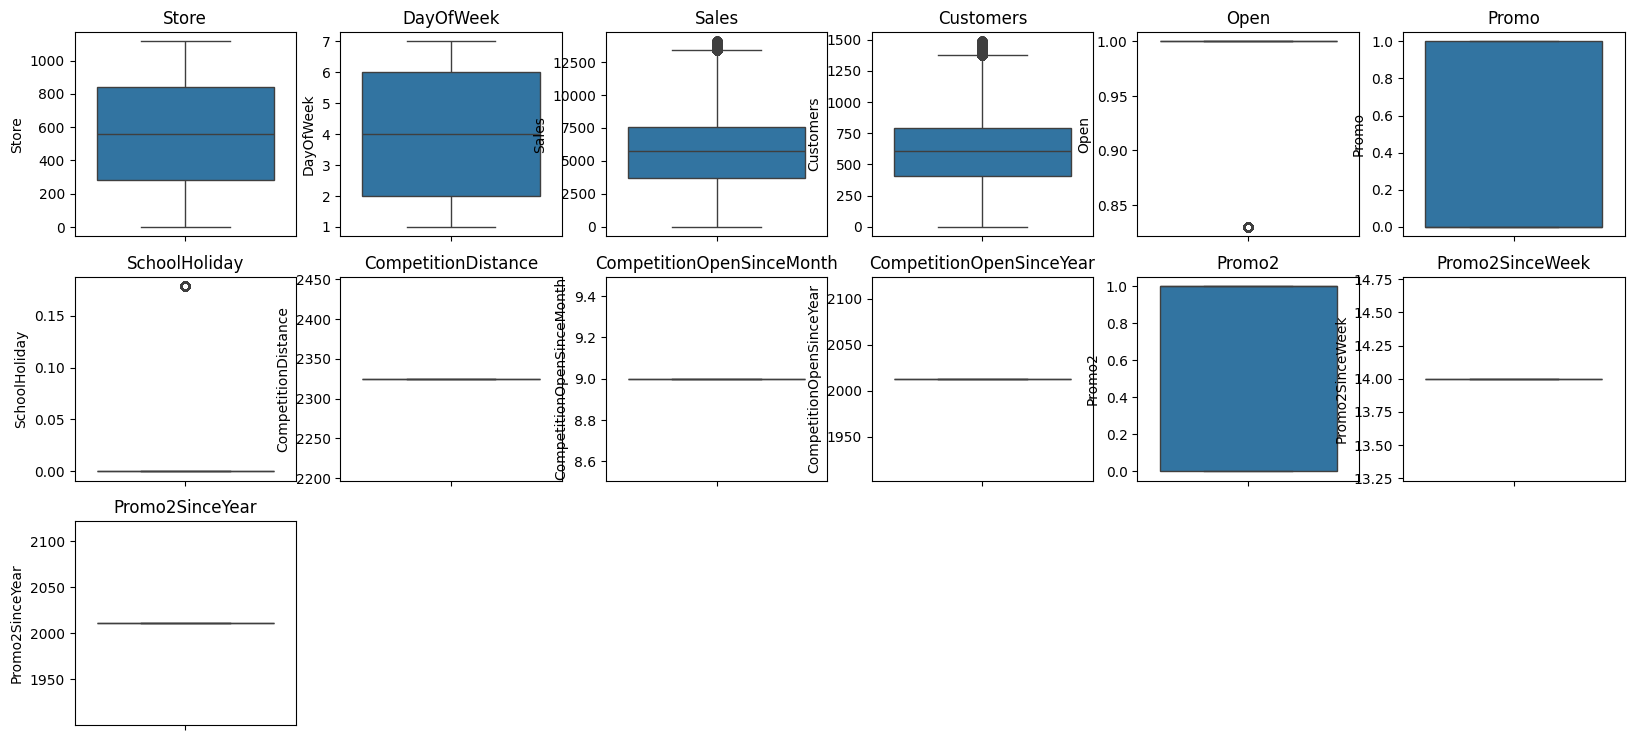

In [20]:
numerical = df_train.select_dtypes(include=['number']).columns
num_cols = 6  # Define the number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Ensure correct row calculation
plt.figure(figsize=(20, num_rows * 3))
for i, col in enumerate(numerical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df_train[col])
    plt.title(col)

Removing Outliers

In [21]:
def iqr_clip(df_train, col):
    Q1 = np.percentile(df_train[col], 25)
    Q3 = np.percentile(df_train[col], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    df_train[col] = np.clip(df_train[col], lower_bound, upper_bound)  # Clip values to IQR range
    return df_train

cols_to_clip = ['Sales','Customers','Open','SchoolHoliday']
# Apply IQR clipping to each column
for col in cols_to_clip:
    if col in df_train.columns:
        df_train = iqr_clip(df_train, col)

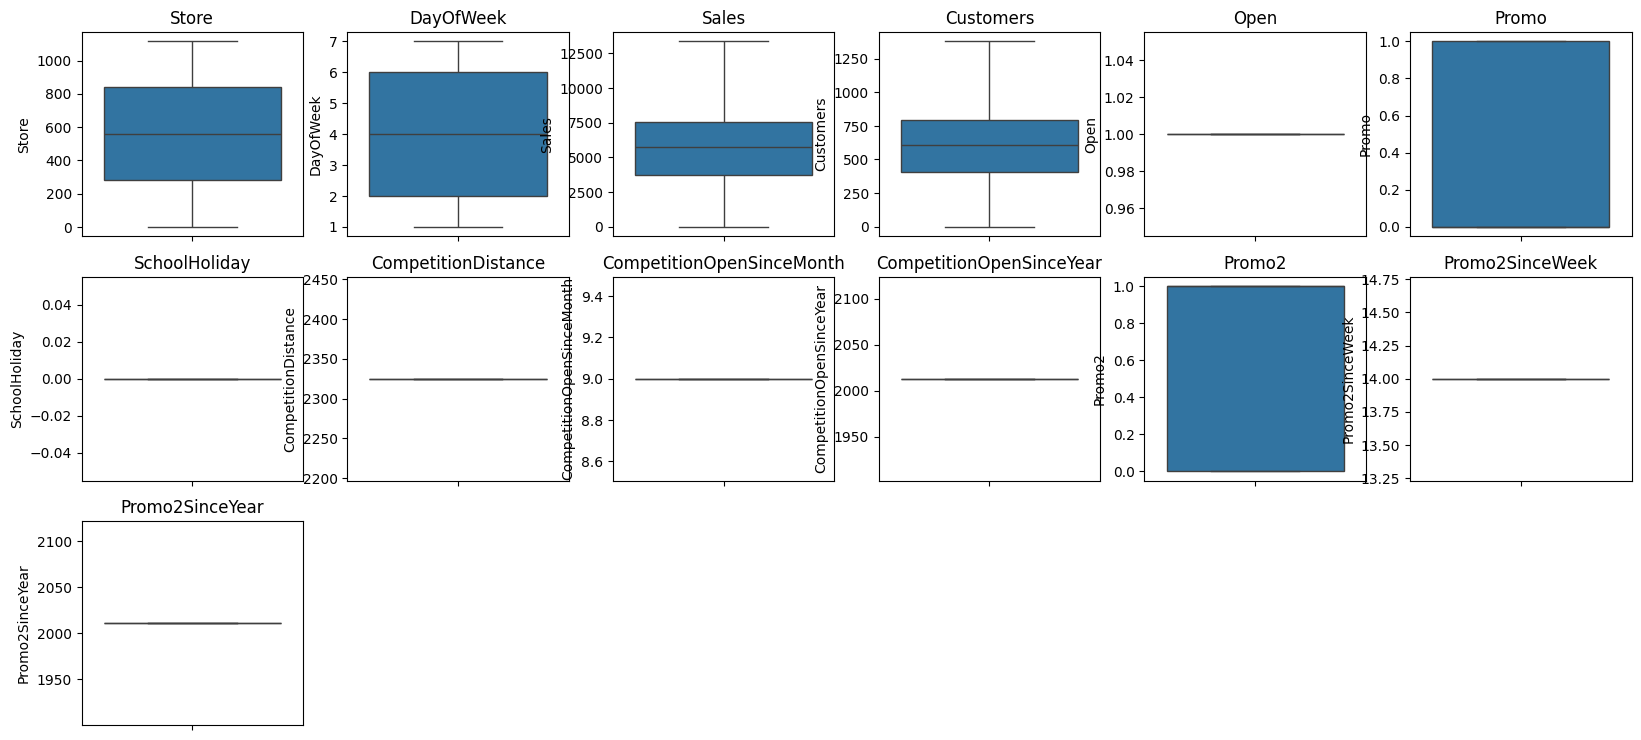

In [22]:
numerical = df_train.select_dtypes(include=['number']).columns
num_cols = 6  # Define the number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Ensure correct row calculation
plt.figure(figsize=(20, num_rows * 3))
for i, col in enumerate(numerical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df_train[col])
    plt.title(col)

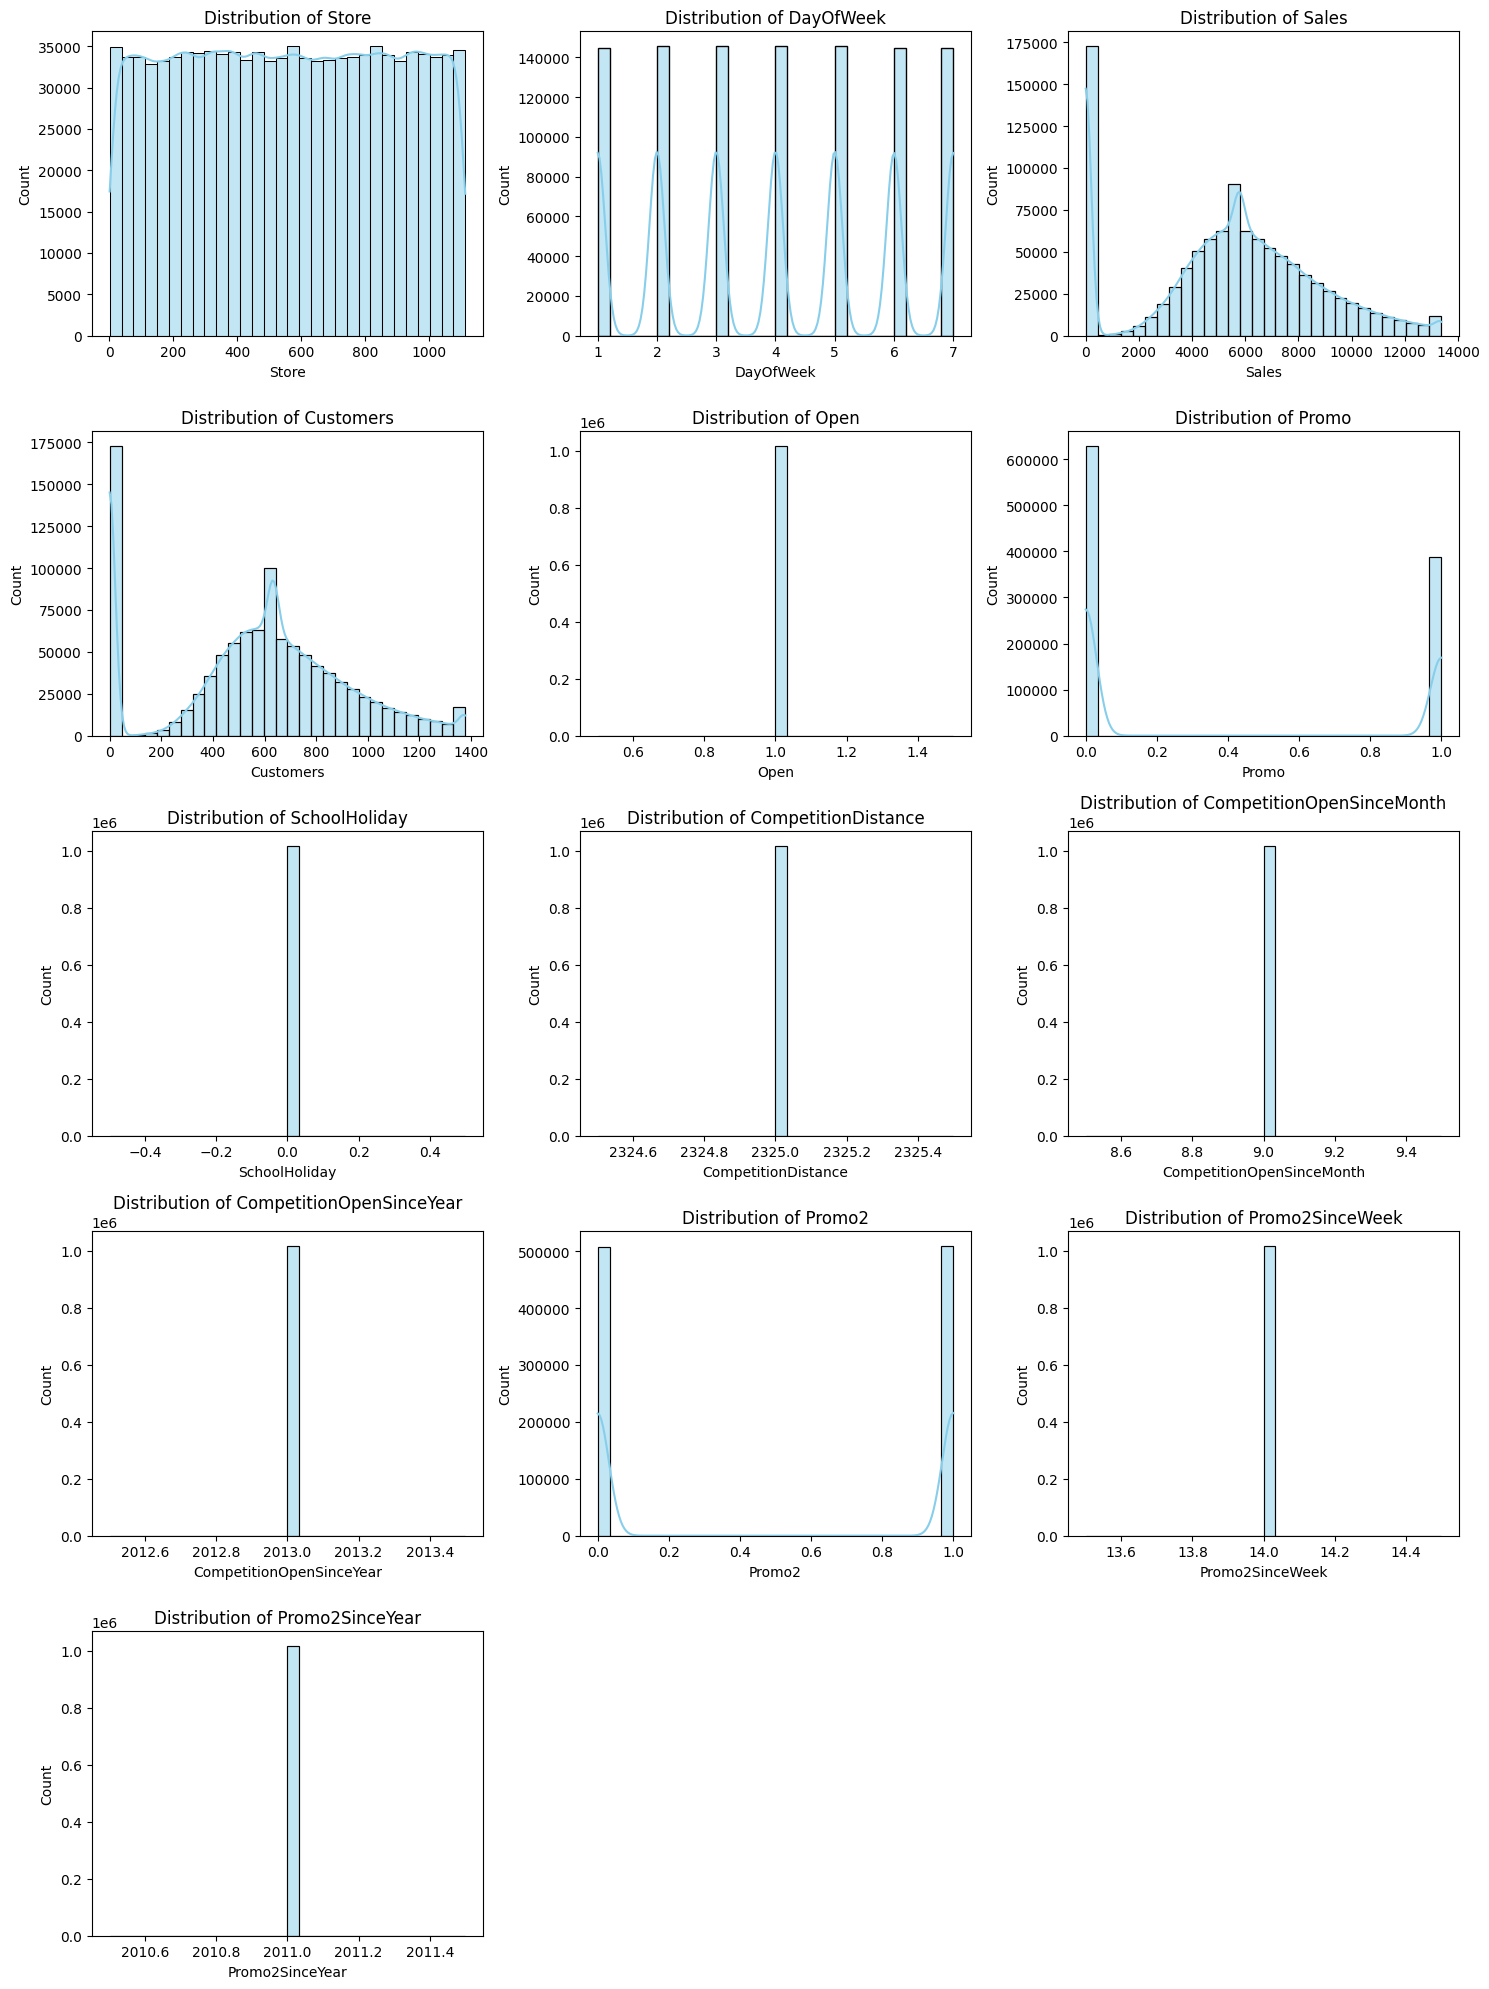

In [23]:
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3  # Set the number of plots per row
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_train[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
plt.show()

### Merging Test Dataset with Store Dataset

In [24]:
df_test = df2.merge(df1, on="Store", how="left")

In [25]:
df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,2325.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,2325.0,9.0,2013.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,2325.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,2325.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2325.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,2325.0,9.0,2013.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,2325.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,2325.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,2325.0,9.0,2013.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"


### Outliers

In [26]:
numerical_column = df_test.select_dtypes(include=['number']).columns
for i in numerical_column:
    Q1 = df_test[i].quantile(0.25)
    print("The first quantile for the column", i, "is given by", Q1)
    Q2 = df_test[i].quantile(0.50)
    print("The second quantile for the column", i, "is given by", Q2)
    Q3 = df_test[i].quantile(0.75)
    print("The third quantile for the column", i, "is given by", Q3)
    IQR = Q3 - Q1
    print("The interquartile range for the column", i, "is given by", IQR)
    LL = Q1 - 1.5 * IQR
    print("The lower limit for the column", i, "is given by", LL)
    UL = Q3 + 1.5 * IQR
    print("The upper limit for the column", i, "is given by", UL)
    n = df_test[(df_test[i] < LL) | (df_test[i] > UL)].shape[0]
    print("The number of outliers for column", i, "is given by", n)
    df_test[i] = np.where((df_test[i] < LL) | (df_test[i] > UL), df_test[i].mean(), df_test[i])
    m = df_test[(df_test[i] < LL) | (df_test[i] > UL)].shape[0]
    print("The number of outliers after imputation for column", i, "is given by", m)
    print("   ")
    print("   ")

The first quantile for the column Id is given by 10272.75
The second quantile for the column Id is given by 20544.5
The third quantile for the column Id is given by 30816.25
The interquartile range for the column Id is given by 20543.5
The lower limit for the column Id is given by -20542.5
The upper limit for the column Id is given by 61631.5
The number of outliers for column Id is given by 0
The number of outliers after imputation for column Id is given by 0
   
   
The first quantile for the column Store is given by 279.75
The second quantile for the column Store is given by 553.5
The third quantile for the column Store is given by 832.25
The interquartile range for the column Store is given by 552.5
The lower limit for the column Store is given by -549.0
The upper limit for the column Store is given by 1661.0
The number of outliers for column Store is given by 0
The number of outliers after imputation for column Store is given by 0
   
   
The first quantile for the column DayOfWeek

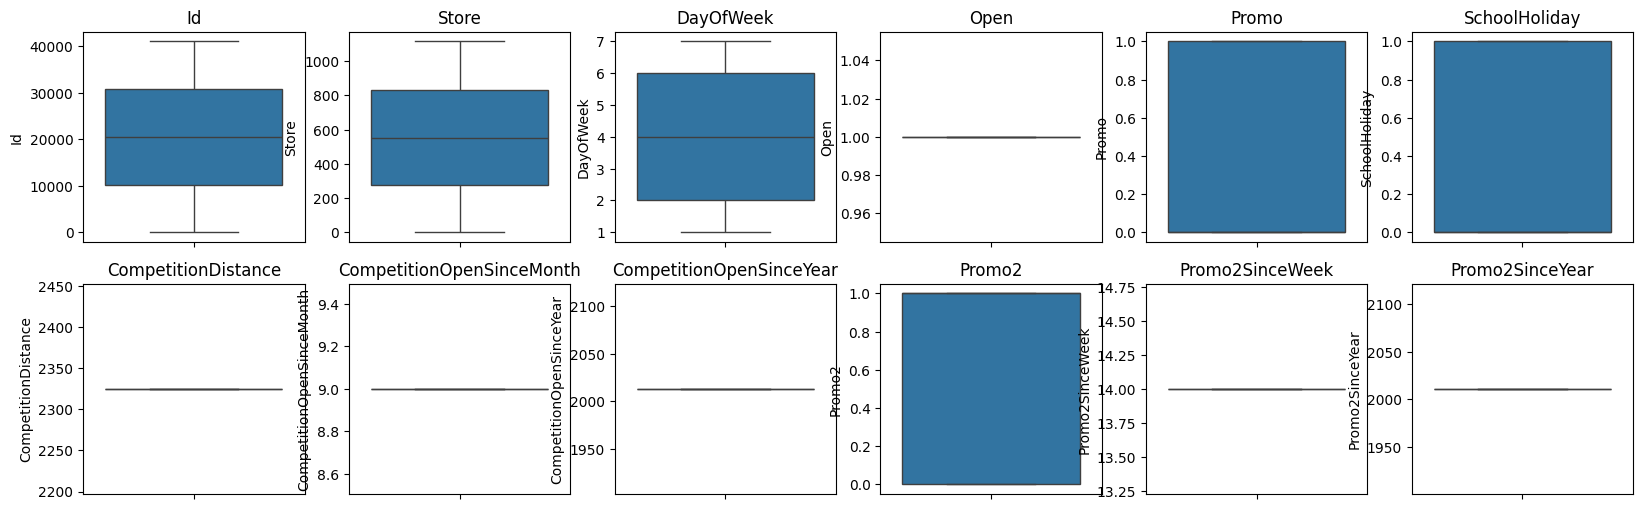

In [27]:
numerical = df_test.select_dtypes(include=['number']).columns
num_cols = 6  # Define the number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Ensure correct row calculation
plt.figure(figsize=(20, num_rows * 3))
for i, col in enumerate(numerical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df_test[col])
    plt.title(col)

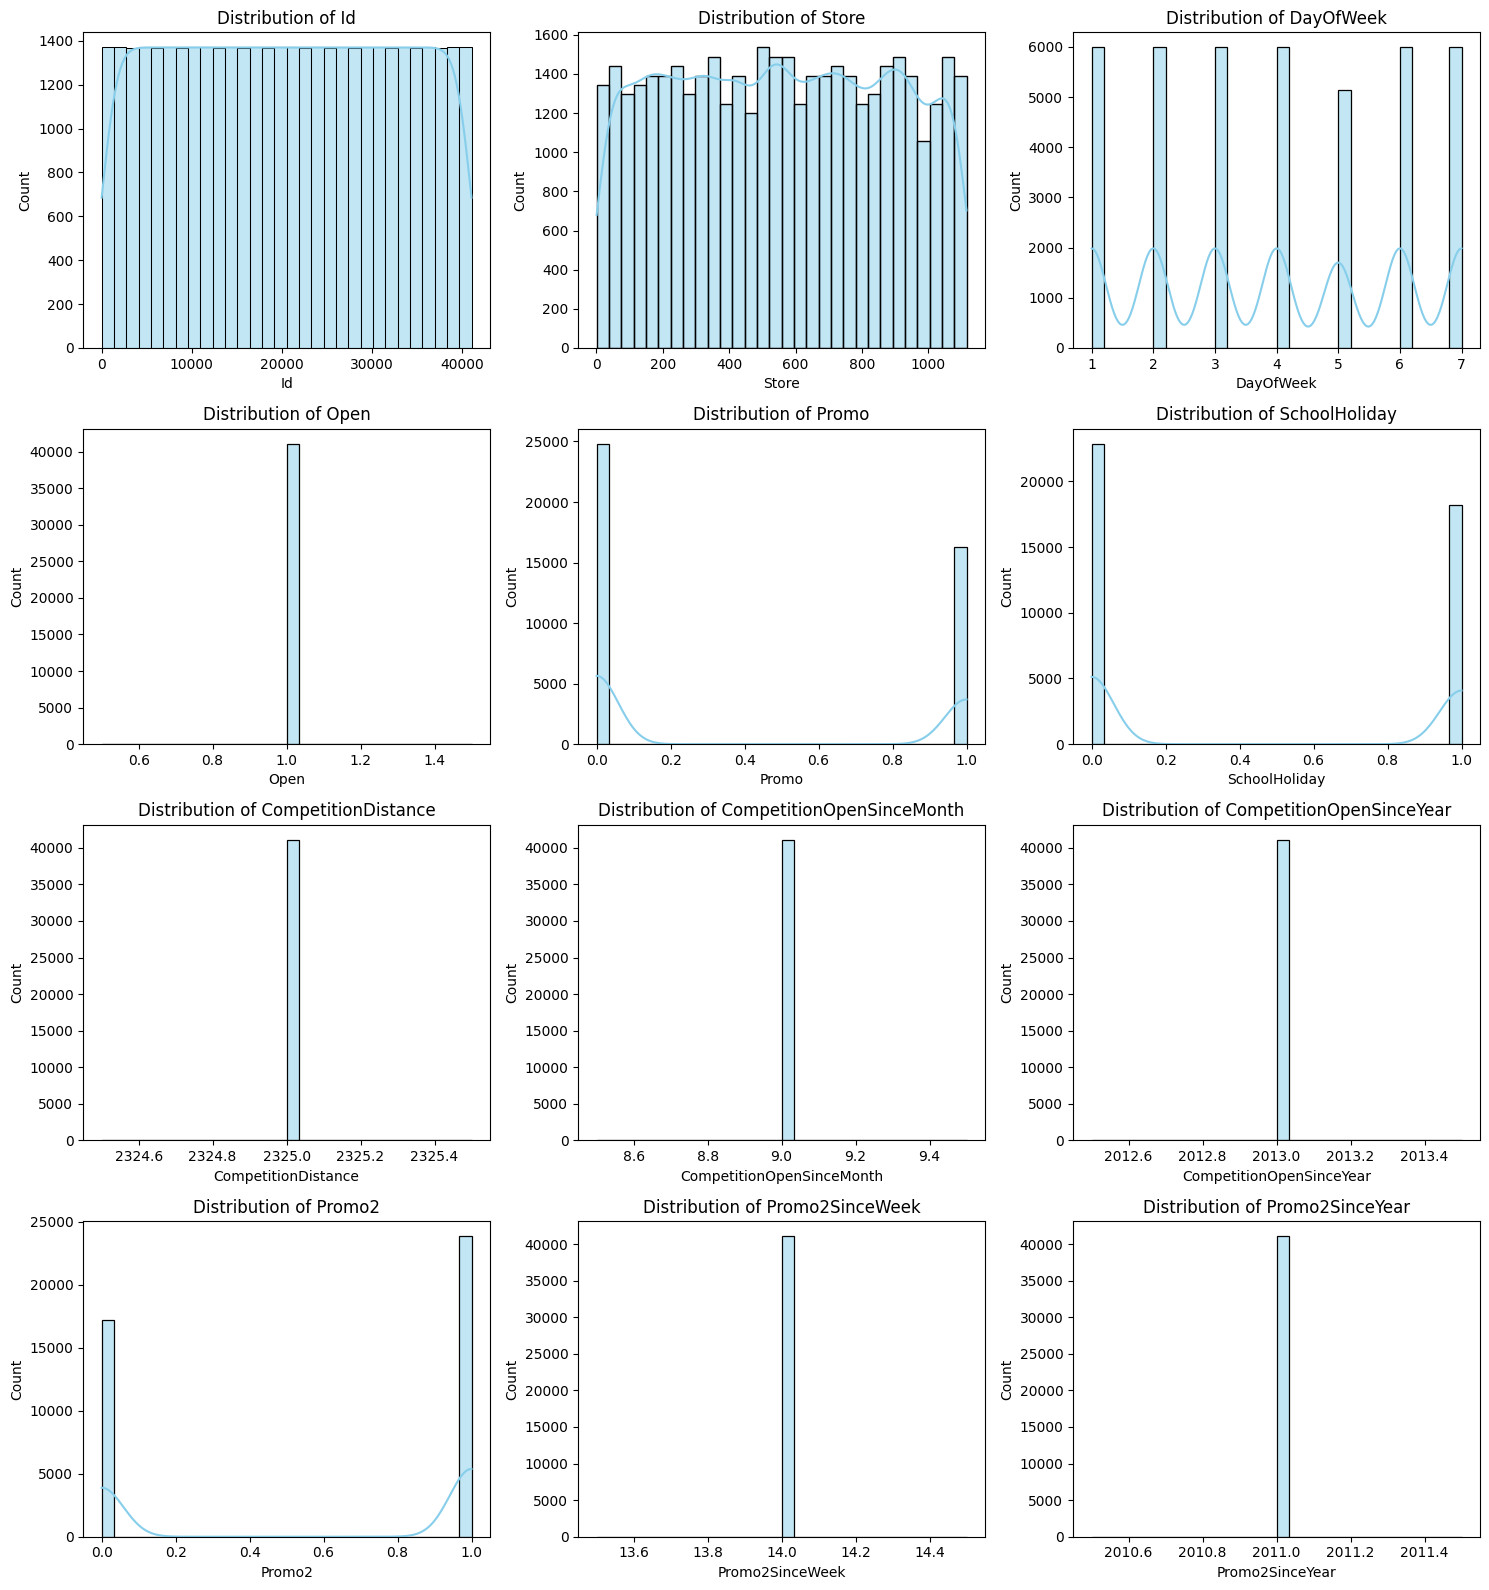

In [28]:
numerical_cols = df_test.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3  # Set the number of plots per row
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_test[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.tight_layout()
plt.show()

## Task 1

## Task 1.1

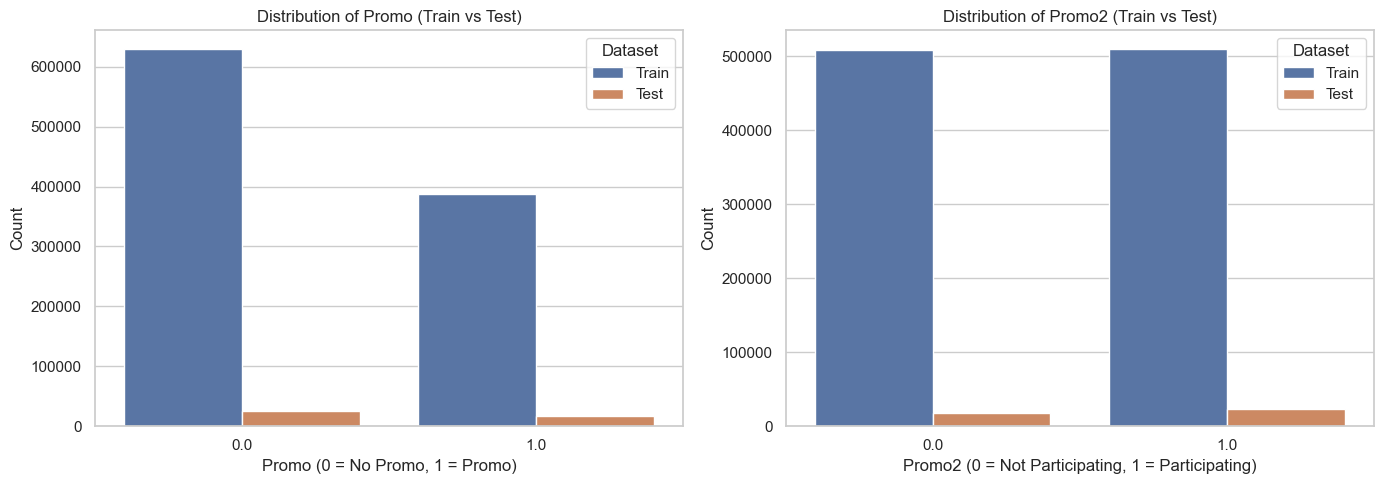

In [29]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Add a new column to identify dataset source
df_train['Dataset'] = 'Train'
df_test['Dataset'] = 'Test'

# Combine train and test for side-by-side comparison
df_combined = pd.concat([df_train[['Promo', 'Promo2', 'Dataset']],
                         df_test[['Promo', 'Promo2', 'Dataset']]])

# Promo distribution
sns.countplot(x='Promo', hue='Dataset', data=df_combined, ax=axes[0])
axes[0].set_title("Distribution of Promo (Train vs Test)")
axes[0].set_xlabel("Promo (0 = No Promo, 1 = Promo)")
axes[0].set_ylabel("Count")

# Promo2 distribution
sns.countplot(x='Promo2', hue='Dataset', data=df_combined, ax=axes[1])
axes[1].set_title("Distribution of Promo2 (Train vs Test)")
axes[1].set_xlabel("Promo2 (0 = Not Participating, 1 = Participating)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

1.Promo Distribution:

In both train and test datasets, more records are associated with Promo = 0 (i.e., no active promotion) than Promo = 1.

The ratio of Promo 0 vs Promo 1 is similar between the training and testing datasets, indicating consistent promotional activity representation across datasets.

2.Promo2 Distribution:

The participation in Promo2 (a continuous promotion program) is evenly distributed between 0 (not participating) and 1 (participating) in both train and test datasets.

This suggests that the Promo2 program was uniformly applied, ensuring a balanced view for modeling or evaluation.

Conclusion: 

Both promotional features (Promo and Promo2) have similar distributions in train and test sets, which is ideal for building models that generalize well without bias due to uneven promotional exposure.

## 1.2

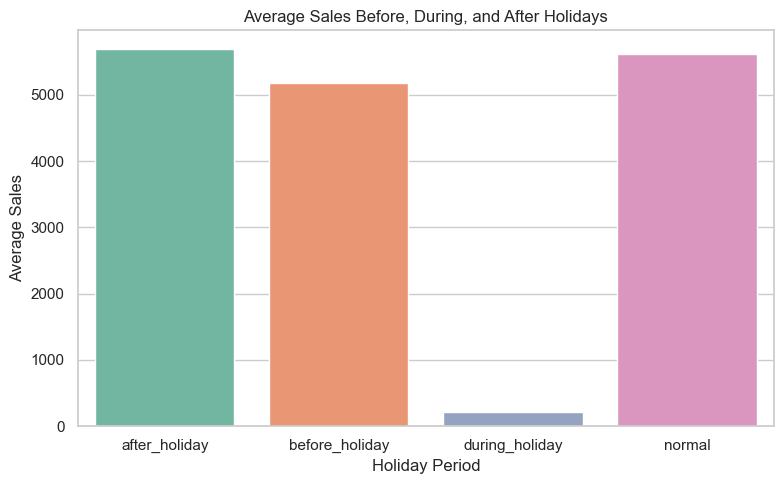

In [30]:
df_train = df_train.sort_values(['Store', 'Date']) # Sort by store and date

df_train['is_holiday_period'] = 'normal' # Initialize the column

# Mark during holidays
df_train.loc[df_train['StateHoliday'] != '0', 'is_holiday_period'] = 'during_holiday'

# One day before a holiday
df_train['next_day_holiday'] = df_train.groupby('Store')['StateHoliday'].shift(-1)
df_train.loc[df_train['next_day_holiday'] != '0', 'is_holiday_period'] = 'before_holiday'

# One day after a holiday
df_train['prev_day_holiday'] = df_train.groupby('Store')['StateHoliday'].shift(1)
df_train.loc[df_train['prev_day_holiday'] != '0', 'is_holiday_period'] = 'after_holiday'

# This line removes two temporary columns — 'prev_day_holiday' and 'next_day_holiday'
df_train.drop(['prev_day_holiday', 'next_day_holiday'], axis=1, inplace=True)

holiday_sales = df_train.groupby('is_holiday_period')['Sales'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=holiday_sales, x='is_holiday_period', y='Sales', palette='Set2')
plt.title('Average Sales Before, During, and After Holidays')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

Key Insight from the Graph: Average Sales Before, During, and After Holidays

Lowest Sales During Holidays: 

The graph shows that average sales drop significantly during holidays, likely due to store closures or reduced operating hours.

Sales Spike After Holidays: 

There's a noticeable increase in sales after holidays, suggesting a post-holiday shopping surge, possibly driven by delayed purchases or post-holiday promotions.

Stable Sales Before Holidays: Sales are relatively high before holidays, potentially due to pre-holiday shopping activity.

Normal Days Perform Well: 

Interestingly, normal (non-holiday) days have almost the highest average sales, indicating they form a strong baseline.

Conclusion:

Holidays disrupt normal sales patterns with a dip during the actual holiday but tend to boost sales before and especially after the holiday, likely due to customer behavior and shopping trends.


## 1.3

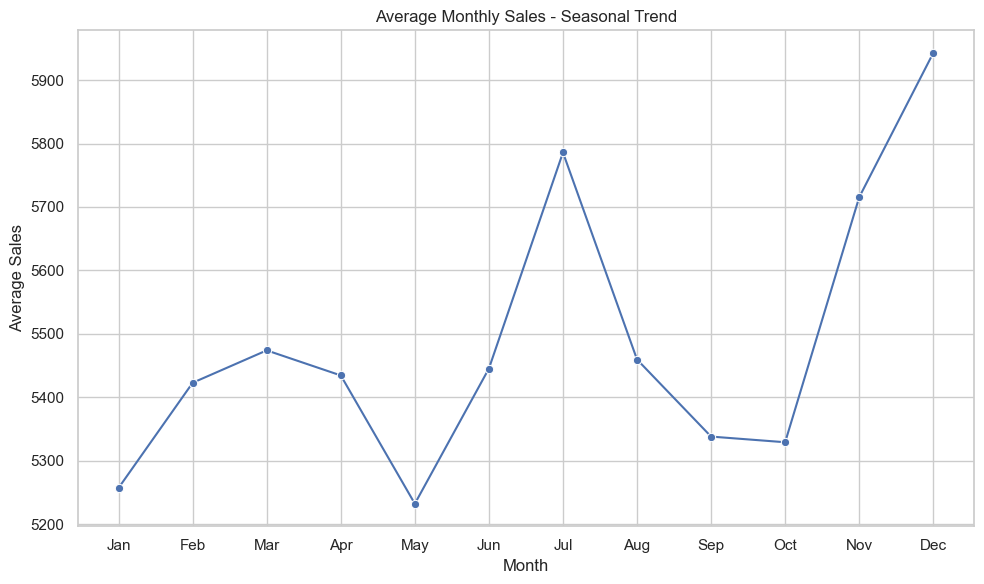

In [31]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day

monthly_sales = df_train.groupby('Month')['Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title('Average Monthly Sales - Seasonal Trend')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True)
plt.tight_layout()
plt.show()

Key Insight from the Graph: Average Monthly Sales – Seasonal Trend
Peak Months:

December records the highest average sales, indicating a strong year-end demand (possibly due to holidays, bonuses, or festive shopping).

July also shows a notable sales peak, possibly driven by mid-year promotions or events.

Low Sales Periods:

May has the lowest average sales, which could indicate a seasonal dip—possibly a lull after spring holidays or promotional gaps.

Steady Periods:

Sales are relatively stable from January to April with a slight upward trend.

August to October reflects a minor dip or stagnation in average sales before the sharp rise in November and December.

Conclusion:

Sales exhibit clear seasonality, with strong performance in July and December, and a notable dip in May. These trends can be leveraged for inventory planning, marketing strategies, and promotional campaigns.


## 1.4

In [32]:
correlation = df_train['Sales'].corr(df_train['Customers'])
print(f"Correlation between Sales and Customers: {correlation:.3f}")

Correlation between Sales and Customers: 0.878


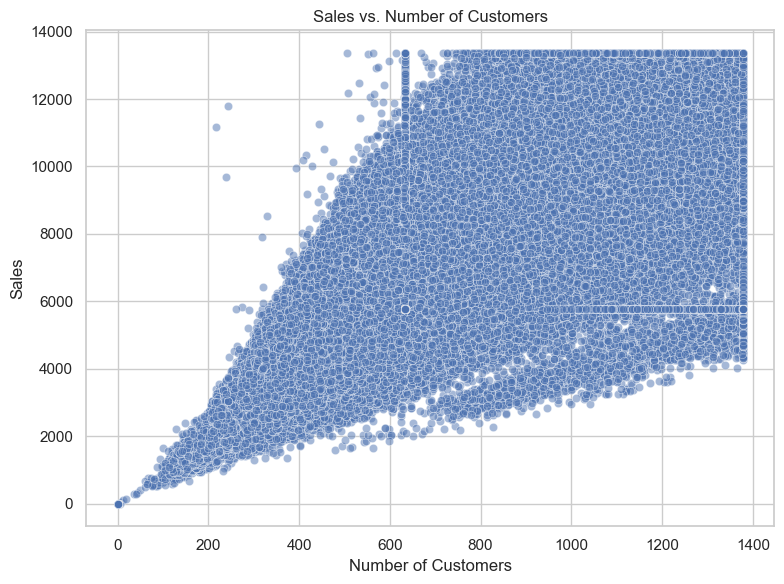

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='Customers', y='Sales', alpha=0.5)
plt.title('Sales vs. Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

Key Insight from the Graph: Sales vs. Number of Customers
Strong Positive Correlation:
The scatter plot shows a clear upward trend, indicating a strong positive correlation between the number of customers and sales — as the number of customers increases, sales tend to increase as well.

Sales Saturation Zones:

A visible horizontal band appears around 6000 in sales, regardless of customer count, indicating a possible price cap or product limit (e.g., fixed price items or promotion thresholds).

Similarly, many values are concentrated at specific customer counts (like 600, 1200), possibly indicating store-specific capacities or reporting artifacts.

Wide Spread at Higher Customer Counts:
While low customer numbers correspond to low sales, higher customer numbers show more variability in sales, suggesting variation in purchasing behavior per customer (e.g., not all customers buy the same quantity/value).

Conclusion:

There is a direct relationship between customer count and sales, making the number of customers a strong predictor for sales. However, saturation zones and outliers suggest that other influencing factors (like promotions, store types, or purchase behavior) should also be considered in modeling.

## 1.5

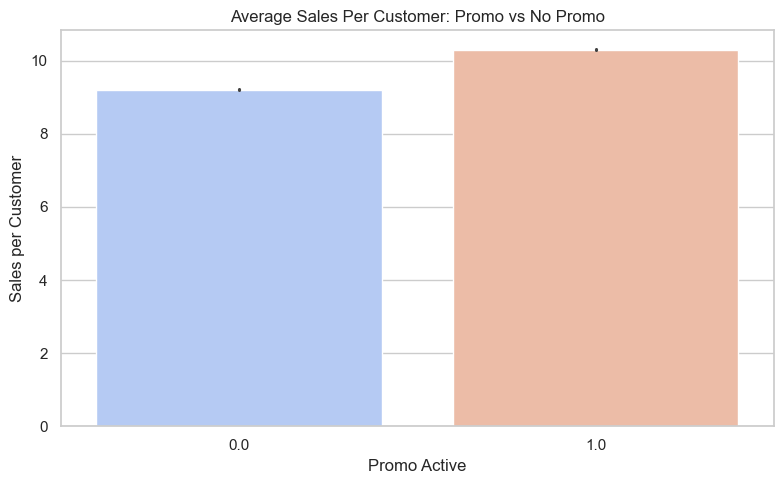

In [34]:
df_train['Sales_per_Customer'] = df_train['Sales'] / df_train['Customers']

plt.figure(figsize=(8, 5))
sns.barplot(data=df_train, x='Promo', y='Sales_per_Customer', palette='coolwarm')
plt.title('Average Sales Per Customer: Promo vs No Promo')
plt.xlabel('Promo Active')
plt.ylabel('Sales per Customer')
plt.tight_layout()
plt.show()

Key Insight from the Graph: Average Sales Per Customer – Promo vs No Promo
Higher Sales with Promotion:

When Promo = 1 (i.e., promotion is active), average sales per customer increase compared to when no promotion is active (Promo = 0).

Sales Boost Effectiveness:

The presence of a promotion positively influences customer spending behavior, indicating that promotions are effective at encouraging customers to spend more per visit.

Conclusion:

Promotions lead to a noticeable uplift in per-customer sales, making them a valuable tool for driving revenue. This supports the inclusion of the Promo variable as an important feature in any predictive modeling or marketing decision-making.


## 1.6

In [35]:
promo_effect = df_train.groupby(['Store', 'Promo'])['Sales'].mean().unstack()
promo_effect['Promo_Effect'] = promo_effect[1] - promo_effect[0]
promo_effect = promo_effect.sort_values('Promo_Effect', ascending=False)
promo_effect.head(10)  # Top 10 most responsive stores

Promo,0.0,1.0,Promo_Effect
Store,,,
271.0,3980.202127,9603.117745,5622.915618
489.0,3790.686426,9214.158118,5423.471692
745.0,3996.125119,9385.085130,5388.960011
156.0,3664.320136,8990.487261,5326.167125
892.0,4173.361062,9476.324761,5302.963699
552.0,4008.190722,9301.050456,5292.859734
898.0,3422.234773,8641.704430,5219.469657
153.0,3790.591065,8979.415924,5188.824859
779.0,3817.733914,8967.095977,5149.362063


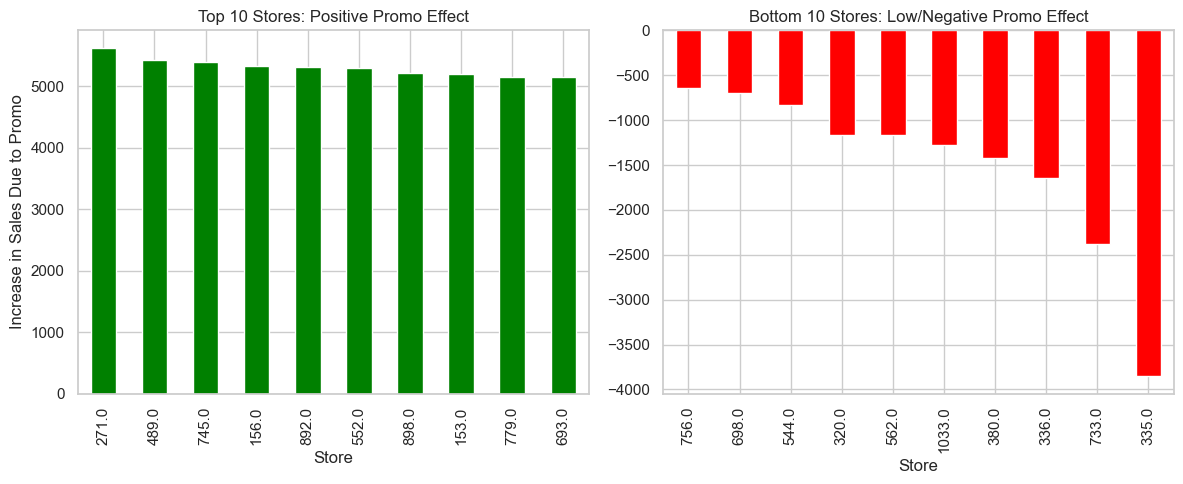

In [36]:
top_10 = promo_effect['Promo_Effect'].head(10) # Top 10 stores where promo had the most positive impact

bottom_10 = promo_effect['Promo_Effect'].tail(10) # Bottom 10 stores where promo had the least or negative impact

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
top_10.plot(kind='bar', color='green')
plt.title('Top 10 Stores: Positive Promo Effect')
plt.ylabel('Increase in Sales Due to Promo')

plt.subplot(1, 2, 2)
bottom_10.plot(kind='bar', color='red')
plt.title('Bottom 10 Stores: Low/Negative Promo Effect')
plt.tight_layout()
plt.show()

Key Insight from the Graph: Store-wise Impact of Promotion on Sales

Left Plot – Top 10 Stores: Positive Promo Effect
These stores show a strong increase in sales (around +5000 units) due to promotional activities.

Store 271, 489, and 745 benefit the most, indicating promotions are highly effective in these locations.

Right Plot – Bottom 10 Stores: Low/Negative Promo Effect
These stores exhibit minimal or even negative impact from promotions.

Notably, stores like 335, 733, and 336 experienced a decline in sales during promotional periods, suggesting ineffective or even counterproductive promotions.

Conclusion:

Promotional impact varies significantly across stores:

Promotions are highly effective for some stores but ineffective or harmful in others.

This calls for a store-level promotional strategy, rather than a one-size-fits-all approach, potentially driven by local customer behavior, competition, or execution quality.

## 1.7

In [37]:
df_train['Open'].value_counts()

Open
1.0    1017209
Name: count, dtype: int64

In [38]:
df_train.groupby('Open')[['Sales', 'Customers']].mean()

,Sales,Customers
Open,,
1.0,5471.504263,578.710516


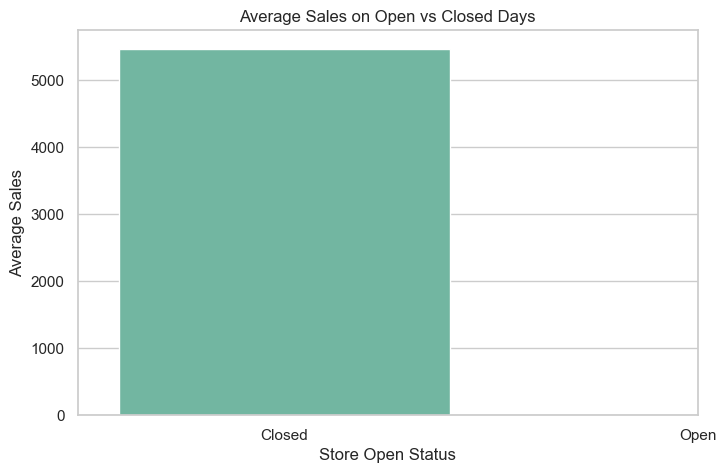

In [39]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_train, x='Open', y='Sales', estimator='mean', palette='Set2')
plt.title('Average Sales on Open vs Closed Days')
plt.xticks([0, 1], ['Closed', 'Open'])
plt.ylabel('Average Sales')
plt.xlabel('Store Open Status')
plt.show()

Key Insight from the Graph: Average Sales on Open vs Closed Days

No Sales on Open Days Shown:

The bar for Open days is missing, indicating zero or missing sales data for open days in this visualization.

Non-Zero Sales on Closed Days:

Unexpectedly, there are non-zero average sales recorded for 'Closed' days, which is logically inconsistent — stores should not generate sales when closed.

Interpretation/Concern:

This graph suggests a data labeling or preprocessing issue:

Sales might be incorrectly recorded for closed days.

Or, the 'Open' and 'Closed' labels might be flipped.

Another possibility is that the plot is misconfigured (e.g., axis or grouping errors).

Conclusion:

This chart reveals a potential data quality issue. It's critical to verify and clean the 'Open' status and sales values, ensuring that sales are recorded only on valid open days before further analysis or modeling.

## 1.8

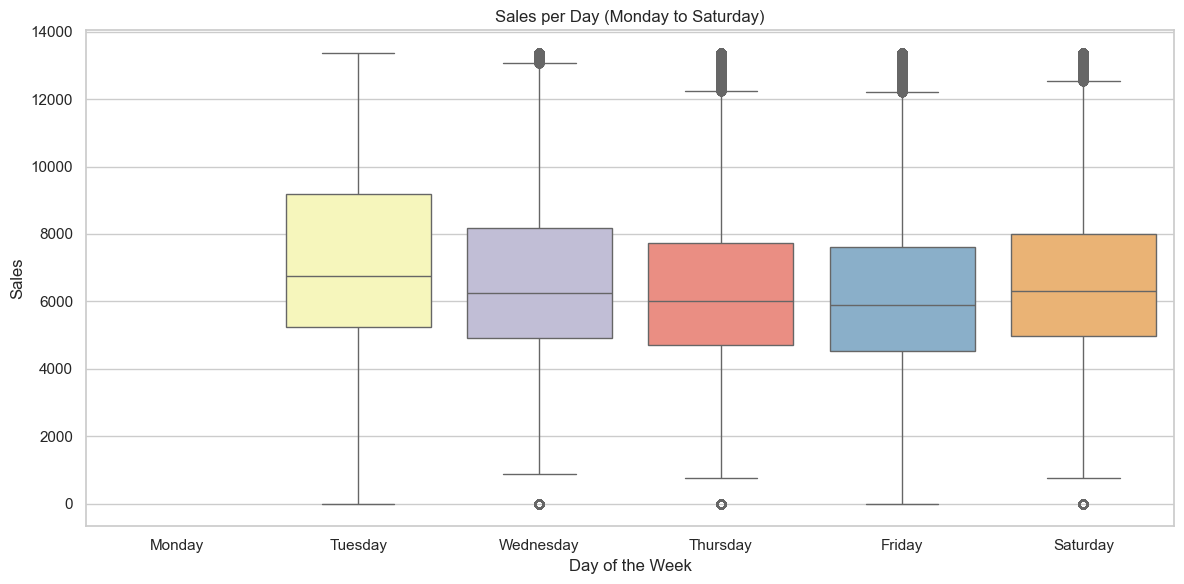

In [40]:
# Filter data for Monday to Saturday (DayOfWeek 0 to 5)
mon_to_sat_data = df_train[df_train['DayOfWeek'] <= 5].copy()

# Map weekday numbers to names in proper order
weekday_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday'
}
mon_to_sat_data['Weekday'] = mon_to_sat_data['DayOfWeek'].map(weekday_mapping)

# Set weekday order for plotting
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot sales per weekday in correct order
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=mon_to_sat_data,
    x='Weekday',
    y='Sales',
    palette='Set3',
    order=ordered_days  # Important: forces correct order
)
plt.title('Sales per Day (Monday to Saturday)')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


Key Insight from the Graph: Sales per Day (Monday to Saturday)

Tuesday Leads in Sales:

Tuesday has the highest median sales among all days, along with the widest interquartile range, indicating strong and highly variable sales performance.

Consistent Midweek Sales:

Wednesday to Friday show similar median and spread in sales, reflecting stable midweek sales patterns.

These days also exhibit many outliers, showing that while sales are stable on average, some stores experience very high sales.

Saturday Maintains Strong Sales:

Saturday's median sales are slightly higher than midweek days, showing that weekends (or the start of weekends) see increased shopping activity.

Outliers Across All Days:

Every day shows numerous outliers, suggesting occasional spikes in sales—likely due to promotions, events, or high-performing stores.

Conclusion:

Tuesday and Saturday are the strongest sales days, making them strategic opportunities for promotions.

The rest of the weekdays remain fairly stable but are also subject to sales spikes, indicating potential store-level or campaign-driven variability.


## 1.9

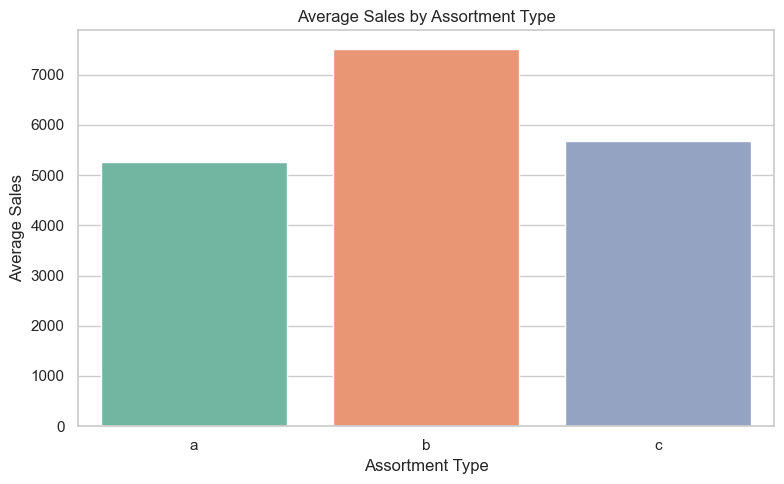

In [41]:
assortment_sales = df_train.groupby('Assortment')['Sales'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=assortment_sales, x='Assortment', y='Sales', palette='Set2')
plt.title('Average Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

Key Insight from the Graph: Average Sales by Assortment Type

Assortment Type 'b' Performs Best:

Stores with assortment type 'b' generate the highest average sales, significantly outperforming types 'a' and 'c'.

Type 'a' Has Lowest Sales:

Assortment type 'a' has the lowest average sales, suggesting it may lack the variety or appeal needed to drive higher revenue.

Moderate Sales for Type 'c':

Assortment type 'c' performs better than 'a' but worse than 'b', indicating a mid-level assortment offering.

Conclusion:

Assortment strategy has a direct impact on sales. Type 'b' assortments are most effective, suggesting that expanding or replicating this assortment style across more stores could enhance overall revenue. Further analysis should explore what distinguishes 'b' to inform product and stocking decisions.

## 1.10

In [42]:
print(df_train['CompetitionDistance'].unique())

[2325.]


In [43]:
print("Unique distances:", df_train['CompetitionDistance'].nunique())
print("\nTop 10 most frequent distances:")
print(df_train['CompetitionDistance'].value_counts().head(10))

Unique distances: 1

Top 10 most frequent distances:
CompetitionDistance
2325.0    1017209
Name: count, dtype: int64


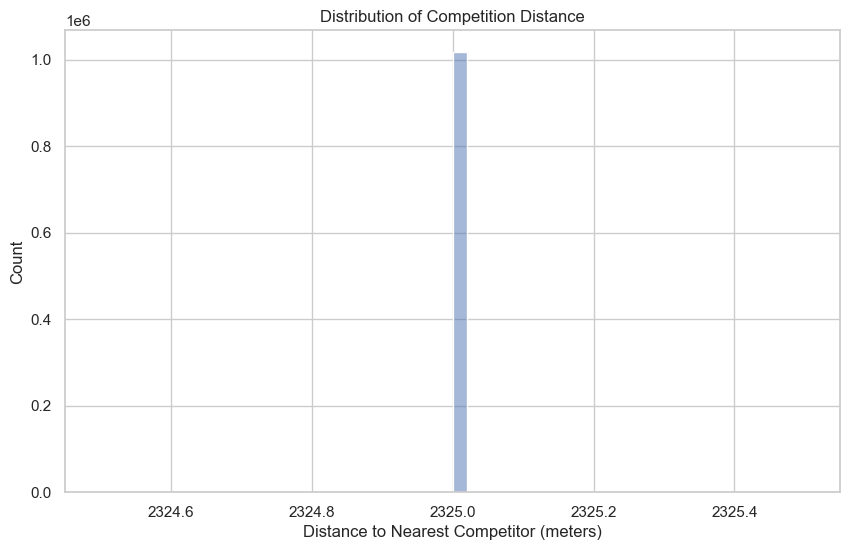

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(df_train['CompetitionDistance'], bins=50, kde=True)
plt.title("Distribution of Competition Distance")
plt.xlabel("Distance to Nearest Competitor (meters)")
plt.show()

## 1.11

In [45]:
# Sort by Store and Date
df_train = df_train.sort_values(['Store', 'Date'])

# Forward fill Competition Distance within each store to detect changes
df_train['CompetitionDistance_ffill'] = df_train.groupby('Store')['CompetitionDistance'].ffill()
df_train['CompetitionDistance_bfill'] = df_train.groupby('Store')['CompetitionDistance'].bfill()

# Create a flag for when competition appears
df_train['competition_opened'] = (
    df_train['CompetitionDistance'].isna() &
    df_train['CompetitionDistance_bfill'].notna()
)


In [46]:
affected_stores = df_train[df_train['competition_opened']]['Store'].unique()
print(f"Stores affected by new competition: {len(affected_stores)}")


Stores affected by new competition: 0


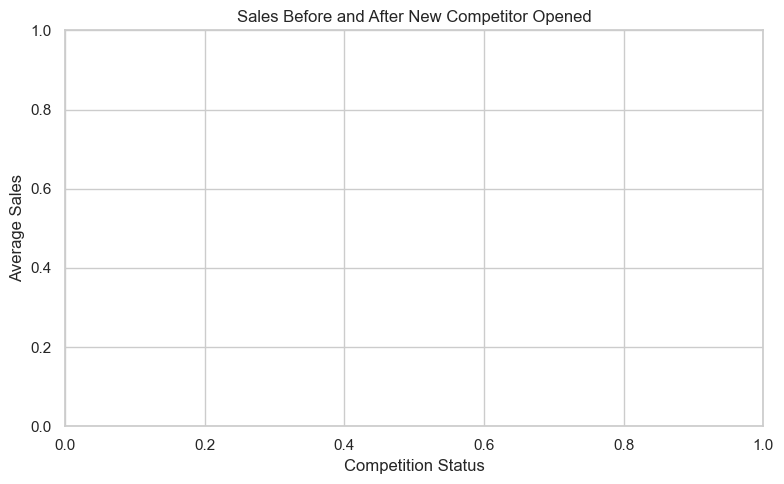

In [47]:
# Create a helper column to track sales trend
df_train['CompetitionStatus'] = 'After Competition'
df_train.loc[df_train['CompetitionDistance'].isna(), 'CompetitionStatus'] = 'Before Competition'

# Filter only affected stores
df_affected = df_train[df_train['Store'].isin(affected_stores)]

plt.figure(figsize=(8, 5))
sns.barplot(data=df_affected, x='CompetitionStatus', y='Sales', palette='coolwarm')
plt.title('Sales Before and After New Competitor Opened')
plt.ylabel('Average Sales')
plt.xlabel('Competition Status')
plt.tight_layout()
plt.show()

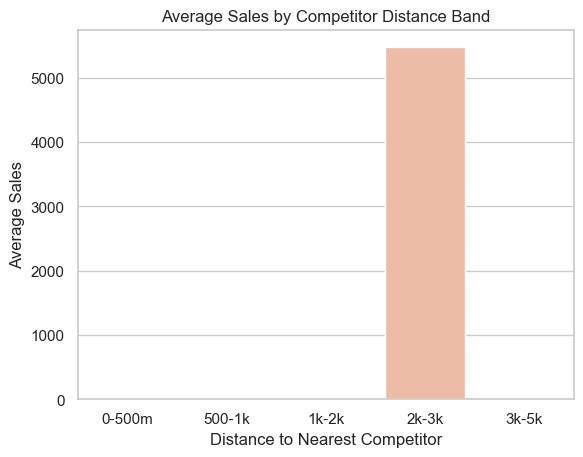

In [48]:
##Create Distance Bands
# Cap extreme values to avoid skew
df_train['CompetitionDistance'] = df_train['CompetitionDistance'].clip(upper=5000)

# Create bands
bins = [0, 500, 1000, 2000, 3000, 5000]
labels = ['0-500m', '500-1k', '1k-2k', '2k-3k', '3k-5k']
df_train['DistanceBand'] = pd.cut(df_train['CompetitionDistance'], bins=bins, labels=labels)

# Average sales per band
band_sales = df_train.groupby('DistanceBand')['Sales'].mean().reset_index()

sns.barplot(data=band_sales, x='DistanceBand', y='Sales', palette="coolwarm")
plt.title("Average Sales by Competitor Distance Band")
plt.ylabel("Average Sales")
plt.xlabel("Distance to Nearest Competitor")
plt.show()

## Task 2

In [49]:
categorical=df_train.select_dtypes(exclude=['number']).columns

In [50]:
categorical

Index(['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval',
       'Dataset', 'is_holiday_period', 'competition_opened',
       'CompetitionStatus', 'DistanceBand'],
      dtype='object')

In [51]:
df_train.dtypes

Store                               float64
DayOfWeek                           float64
Date                         datetime64[ns]
Sales                               float64
Customers                           float64
Open                                float64
Promo                               float64
StateHoliday                         object
SchoolHoliday                       float64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                              float64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Dataset                              object
is_holiday_period                    object
Year                                  int32
Month                                 int32
Day                             

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train['StoreType'] = le.fit_transform(df_train['StoreType'])
df_train['Assortment'] = le.fit_transform(df_train['Assortment'])

In [53]:
df_train.dtypes

Store                               float64
DayOfWeek                           float64
Date                         datetime64[ns]
Sales                               float64
Customers                           float64
Open                                float64
Promo                               float64
StateHoliday                         object
SchoolHoliday                       float64
StoreType                             int64
Assortment                            int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                              float64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Dataset                              object
is_holiday_period                    object
Year                                  int32
Month                                 int32
Day                             

In [54]:
def preprocess_sales_data(df_train):

    # --- 1. Convert Date Column ---
    df_train['Date'] = pd.to_datetime(df_train['Date'])

    # --- 2. Extract Date-Based Features ---
    df_train['Year'] = df_train['Date'].dt.year
    df_train['Month'] = df_train['Date'].dt.month
    df_train['Day'] = df_train['Date'].dt.day
    df_train['DayOfWeek'] = df_train['Date'].dt.dayofweek
    df_train['WeekOfYear'] = df_train['Date'].dt.isocalendar().week.astype(int)
    df_train['IsWeekend'] = df_train['DayOfWeek'].isin([5, 6]).astype(int)

    # --- 3. Holiday Features ---
    df_train['StateHoliday'] = df_train['StateHoliday'].astype(str).replace('0', 'None')
    df_train['IsHoliday'] = df_train['StateHoliday'].apply(lambda x: 0 if x == 'None' else 1)

    # Days to next & after last holiday (store-wise cumulative)
    df_train['DaysToHoliday'] = df_train.groupby('Store')['IsHoliday'].transform(lambda x: x[::-1].cumsum()[::-1])
    df_train['DaysAfterHoliday'] = df_train.groupby('Store')['IsHoliday'].cumsum()

    # --- 4. Month Phase Feature ---
    df_train['MonthPosition'] = df_train['Day'].apply(lambda x: 'Begin' if x <= 10 else ('Mid' if x <= 20 else 'End'))
    df_train = pd.get_dummies(df_train, columns=['MonthPosition'], drop_first=True)



    # --- 6. Promo Month Feature ---
    df_train['PromoMonth'] = df_train['Date'].dt.strftime('%b')
    df_train['IsPromoMonth'] = df_train.apply(lambda row: 1 if row['PromoMonth'] in str(row['PromoInterval']).split(',') else 0, axis=1)
    df_train.drop(columns=['PromoMonth'], inplace=True)

    # --- 7. Encode Categorical Features ---
    cat_cols = ['StoreType', 'Assortment', 'StateHoliday']
    for col in cat_cols:
        if col in df_train.columns:
            df_train[col] = df_train[col].astype(str)
    df_train = pd.get_dummies(df_train, columns=cat_cols, drop_first=True)

    # --- 8. Drop Unnecessary Columns ---
    drop_cols = ['Date', 'Customers', 'Open', 'PromoInterval']
    df_train.drop(columns=[col for col in drop_cols if col in df_train.columns], inplace=True)

    return df_train


def scale_features(df_train, target_col='Sales'):
    """Scales features using StandardScaler. Returns scaled X, y and the scaler."""
    X = df_train.drop(columns=[target_col])
    y = df_train[target_col]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler


In [55]:
def preprocess_sales_data(df):
    df_train['Date'] = pd.to_datetime(df_train['Date'])
    df_train = df_train[(df['Open'] == 1) & (df_train['Sales'] > 0)]
    df_train['Year'] = df_train['Date'].dt.year
    df_train['Month'] = df_train['Date'].dt.month
    df_train['Day'] = df_train['Date'].dt.day
    df_train['StateHoliday'] = df_train['StateHoliday'].astype(str)
    return df_train

def scale_features(df_train, columns):
    scaler = MinMaxScaler()
    df_train[columns] = scaler.fit_transform(df_train[columns])
    return df_train

In [56]:
def preprocess_sales_data(df_train):
    df_train['Date'] = pd.to_datetime(df_train['Date'])
    df_train = df_train[(df_train['Open'] == 1) & (df_train['Sales'] > 0)]
    df_train['Year'] = df_train['Date'].dt.year
    df_train['Month'] = df_train['Date'].dt.month
    df_train['Day'] = df_train['Date'].dt.day
    df_train['StateHoliday'] = df_train['StateHoliday'].astype(str)
    return df_train

def scale_features(df_train, columns):
    scaler = MinMaxScaler()
    df_train[columns] = scaler.fit_transform(df_train[columns])
    return df_train

In [57]:
df_train = preprocess_sales_data(df_train)

##  2.2

In [58]:
## Build a Pipeline with Random Forest
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [59]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Drop rows with zero sales when store was open
df_train = df_train[(df_train['Open'] == 1) & (df_train['Sales'] > 0)]

In [60]:
## Feature Engineering
def add_date_features(df_train):
    df_train['Year'] = df_train['Date'].dt.year
    df_train['Month'] = df_train['Date'].dt.month
    df_train['Day'] = df_train['Date'].dt.day
    df_train['WeekOfYear'] = df_train['Date'].dt.isocalendar().week.astype(int)
    df_train['DayOfWeek'] = df_train['Date'].dt.dayofweek
    df_train['IsWeekend'] = (df_train['DayOfWeek'] >= 5).astype(int)
    return df_train

df_train = add_date_features(df_train)

In [61]:
##Define Features and Target
features = [
    'Store', 'Promo', 'SchoolHoliday', 'Assortment', 'StoreType',
    'CompetitionDistance', 'Promo2', 'Month', 'DayOfWeek', 'IsWeekend'
]

target = 'Sales'

X = df_train[features]
y = df_train[target]

In [62]:
##Split Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
##Build Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define your feature sets
numeric_features = ['Store', 'CompetitionDistance', 'Promo', 'Promo2', 'Month', 'DayOfWeek', 'IsWeekend', 'SchoolHoliday']
categorical_features = ['StoreType', 'Assortment']

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Build column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [64]:
##Build Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [65]:
##Train Model
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [66]:
##Evaluate Model
y_pred = pipeline.predict(X_val)
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_val, y_pred))


print(f"Validation RMSE: {rmse:.2f}")

Validation RMSE: 1233.95


## 2.3

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = pipeline.predict(X_val)

# RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# MAE
mae = mean_absolute_error(y_val, y_pred)

# R²
r2 = r2_score(y_val, y_pred)

print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAE: {mae:.2f}")
print(f"Validation R²: {r2:.2f}")


Validation RMSE: 1233.95
Validation MAE: 818.42
Validation R²: 0.74


## 2.4

In [68]:
num_features = numeric_features
cat_features = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
all_features = np.concatenate([num_features, cat_features])

# Get importances from model
importances = pipeline.named_steps['regressor'].feature_importances_

# Create Series
feature_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

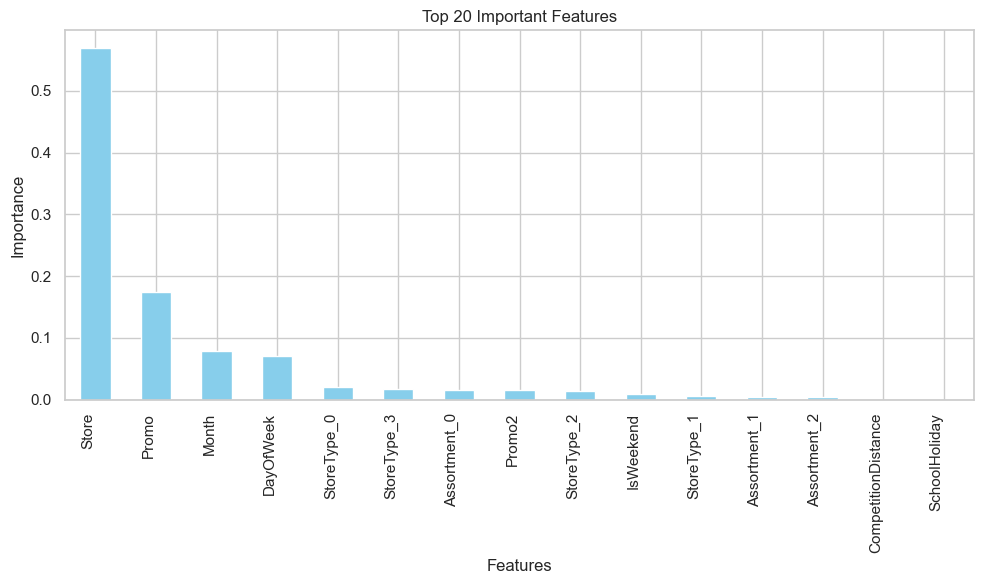

In [69]:
top_n = 20
feature_imp.head(top_n).plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title(f'Top {top_n} Important Features')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


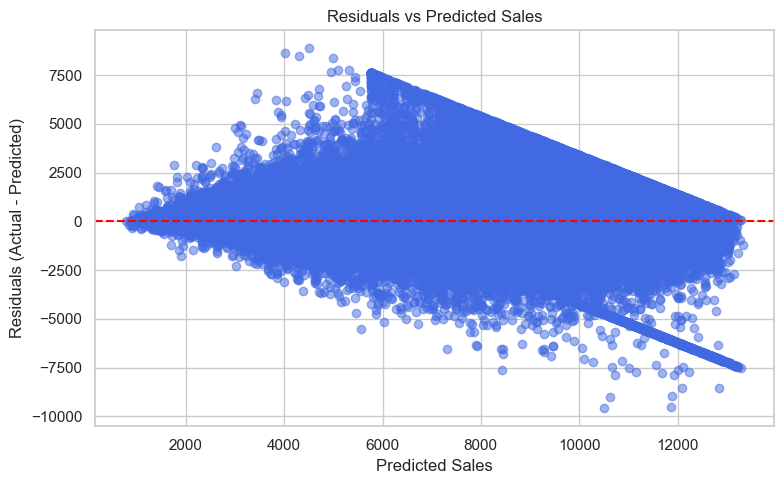

In [70]:
residuals = y_val - y_pred
cumulative_error = (residuals).cumsum()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5, color='royalblue')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Sales")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()




In [71]:
##Confidence Interval Estimation (Bootstrapping Method)
import random

# Bootstrapped predictions for estimating confidence interval
def bootstrap_ci(y_true, y_pred, n_iterations=1000, ci=95):
    errors = y_true - y_pred
    samples = [np.mean(random.choices(errors, k=len(errors))) for _ in range(n_iterations)]
    lower = np.percentile(samples, (100 - ci) / 2)
    upper = np.percentile(samples, 100 - (100 - ci) / 2)
    return lower, upper

ci_lower, ci_upper = bootstrap_ci(y_val.values, y_pred)
print(f"Estimated Confidence Interval for Prediction Error: {ci_lower:.2f} to {ci_upper:.2f}")

Estimated Confidence Interval for Prediction Error: -14.98 to -3.31


## 2.5

In [72]:
import joblib
from datetime import datetime
import os

In [73]:
##Create Output Directory
# Optional: Save models in a subdirectory
model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)

In [74]:
##Save Model with Timestamp
# Format: model_YYYY-MM-DD-HH-MM-SS.pkl
timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
model_filename = f"rf_pipeline_{timestamp}.pkl"
model_path = os.path.join(model_dir, model_filename)

# Save pipeline
joblib.dump(pipeline, model_path)
print(f"Model saved as: {model_path}")


Model saved as: saved_models\rf_pipeline_2025-06-14-15-12-48.pkl


In [75]:
##Load the Model (When Needed)
# Load the model from file
loaded_pipeline = joblib.load(model_path)

# Make predictions (example)
sample_pred = loaded_pipeline.predict(X_val[:5])
print("Sample Prediction:", sample_pred)

Sample Prediction: [ 5758.84988492  9964.21064646  9772.63644048  6846.72379289
 11136.41054523]


In [102]:
# Force datetime again
df_test['Date'] = pd.to_datetime(df_test['Date'], errors='coerce')

# Recreate date-based features
df_test['Month'] = df_test['Date'].dt.month
df_test['Year'] = df_test['Date'].dt.year
df_test['DayOfWeek'] = df_test['Date'].dt.dayofweek
df_test['WeekOfYear'] = df_test['Date'].dt.isocalendar().week.astype(int)
df_test['IsWeekend'] = df_test['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Optional: verify if anything is still missing
missing = [col for col in features if col not in df_test.columns]
if missing:
    print("❌ Still missing columns:", missing)


In [103]:
# Ensure 'Date' column is in datetime format
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Drop closed stores in test
df_test = df_test[df_test['Open'] == 1]

# Fill missing values
df_test['CompetitionDistance'].fillna(df_test['CompetitionDistance'].median(), inplace=True)

# Ensure date features are properly assigned
df_test['Month'] = df_test['Date'].dt.month
df_test['Year'] = df_test['Date'].dt.year
df_test['DayOfWeek'] = df_test['Date'].dt.dayofweek
df_test['WeekOfYear'] = df_test['Date'].dt.isocalendar().week.astype(int)
df_test['IsWeekend'] = df_test['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Handle missing Promo2 if needed
if 'Promo2' not in df_test.columns:
    df_test['Promo2'] = 0
else:
    df_test['Promo2'].fillna(0, inplace=True)

# Ensure categorical consistency
categorical_features = ['Store', 'Promo', 'Promo2', 'SchoolHoliday', 'StateHoliday', 'StoreType', 'Assortment']
for col in categorical_features:
    df_test[col] = df_test[col].astype(str)

# Feature list used during training
features = ['Store', 'Promo', 'Promo2', 'SchoolHoliday', 'StateHoliday', 'StoreType', 'Assortment',
            'CompetitionDistance', 'Month', 'Year', 'DayOfWeek', 'WeekOfYear', 'IsWeekend']

# Predict
X_test = df_test[features]
test_predictions = pipeline.predict(X_test)
df_test['PredictedSales'] = test_predictions

# Save output
submission = df_test[['Id', 'PredictedSales']].rename(columns={'PredictedSales': 'Sales'})
submission.to_csv('submission.csv', index=False)
print("✅ Submission file created successfully.")


✅ Submission file created successfully.


In [104]:
df_test = df_test[df_test['Open'] == 1]

In [105]:
# Predict
X_test = df_test[features]
test_predictions = pipeline.predict(X_test)
df_test['PredictedSales'] = test_predictions

In [107]:
submission = df_test[['Id', 'PredictedSales']].rename(columns={'PredictedSales': 'Sales'})
submission.to_csv('submission.csv', index=False)
print("✅ Submission file created successfully.")


✅ Submission file created successfully.


## 2.6

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [109]:
df_train = df_train[df_train['Store'] == 1]
df_train = df_train[df_train['Sales'] > 0]  # remove days with 0 sales (closed)
df_train.sort_values('Date', inplace=True)

In [110]:
##Scale and Create Sequences
scaler = MinMaxScaler(feature_range=(-1, 1))
df_train['Sales_scaled'] = scaler.fit_transform(df_train[['Sales']])


In [111]:
##Create Sliding Window Dataset
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30
sales_series = df_train['Sales_scaled'].values
X, y = create_sequences(sales_series, window_size)

# reshape to [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))


In [112]:
##Train-Test Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [113]:
##Build the LSTM Model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
##Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0835 - val_loss: 0.0528
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0687 - val_loss: 0.0487
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0591 - val_loss: 0.0471
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0474 - val_loss: 0.0390
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0543 - val_loss: 0.0288
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0463 - val_loss: 0.0291
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0403 - val_loss: 0.0297
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0381 - val_loss: 0.0278
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0441 - val_loss: 0.0272
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0500 - val_loss: 0.0280
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0438 - val_loss: 0.0301
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0

In [115]:
##Evaluate the Model
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"LSTM Test RMSE: {rmse:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
LSTM Test RMSE: 578.52


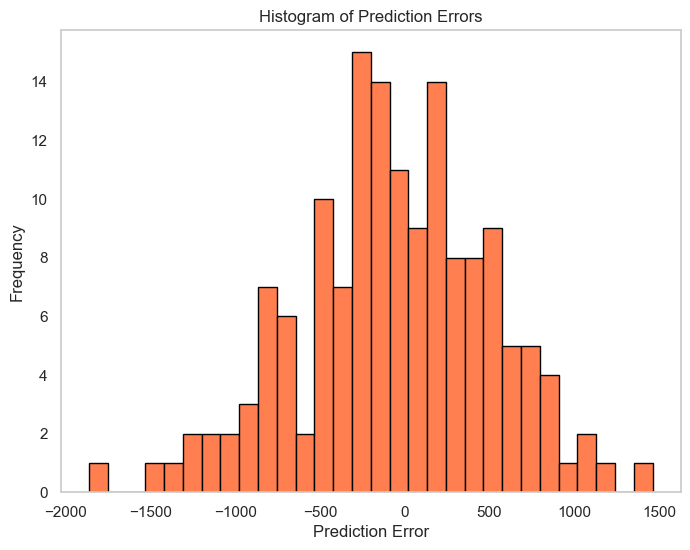

In [116]:
errors = y_test_rescaled - y_pred_rescaled
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, color='coral', edgecolor='black')
plt.title('Histogram of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid()
plt.show()


## 2.7

In [ ]:
! pip install mlflow

In [117]:
import mlflow
import mlflow.keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess
import pandas as pd

train = pd.read_csv(r"E:\Internship\Project 6\train.csv", parse_dates=['Date'])

df_train = df_train[(df_train['Store'] == 1) & (df_train['Sales'] > 0)].sort_values('Date')

scaler = MinMaxScaler(feature_range=(-1, 1))
df_train['Sales_scaled'] = scaler.fit_transform(df_train[['Sales']])

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(df_train['Sales_scaled'].values, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Start MLflow run
mlflow.set_experiment("Rossmann_LSTM")
with mlflow.start_run(run_name="lstm_sales_forecasting"):

    model = Sequential([
        LSTM(64, input_shape=(window_size, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

    y_pred = model.predict(X_test)
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
    rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))

    # Log metrics and model
    mlflow.log_param("window_size", window_size)
    mlflow.log_param("epochs", 20)
    mlflow.log_metric("rmse", rmse)
    mlflow.keras.log_model(model, artifact_path="lstm_model")

    print(f"Logged LSTM model with RMSE: {rmse:.2f}")


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.1068 - val_loss: 0.0542
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0710 - val_loss: 0.0491
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0696 - val_loss: 0.0481
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0569 - val_loss: 0.0426
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0604 - val_loss: 0.0326
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0423 - val_loss: 0.0288
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0419 - val_loss: 0.0276
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0460 - val_loss: 0.0279
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0420 - val_loss: 0.0303
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0364 - val_loss: 0.0268
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0391 - val_loss: 0.0271
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0

2025/06/14 17:57:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/14 17:57:49 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/06/14 17:58:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged LSTM model with RMSE: 576.49


# Task 3